In [1]:
import numpy as np
import random
import itertools
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from matplotlib.lines import Line2D
import pandas as pd
from torch.autograd import Variable

# Design and build a simple dataset X of for character recognition of 10 16x16-pixel images of well-formed typeset (not handwritten) digits 0 through 9  (256 pixels per image) from online exemplars.

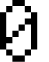

In [2]:
# Read image file
im0 = Image.open('train_dataset/0.png')
im1 = Image.open('train_dataset/1.png')
im2 = Image.open('train_dataset/2.png')
im3 = Image.open('train_dataset/3.png')
im4 = Image.open('train_dataset/4.png')
im5 = Image.open('train_dataset/5.png')
im6 = Image.open('train_dataset/6.png')
im7 = Image.open('train_dataset/7.png')
im8 = Image.open('train_dataset/8.png')
im9 = Image.open('train_dataset/9.png')
im0

In [3]:
# Resize images
# reshape the image to 16x16-pixel
im0 = im0.resize((16,16))
# change the RGB image to binaryzation.
im0 = im0.convert('1')

im1 = im1.resize((16,16))
im1 = im1.convert('1')

im2 = im2.resize((16,16))
im2 = im2.convert('1')

im3 = im3.resize((16,16))
im3 = im3.convert('1')


im4 = im4.resize((16,16))
im4 = im4.convert('1')

im5 = im5.resize((16,16))
im5 = im5.convert('1')


im6 = im6.resize((16,16))
im6 = im6.convert('1')

im7 = im7.resize((16,16))
im7 = im7.convert('1')

im8 = im8.resize((16,16))
im8 = im8.convert('1')

im9 = im9.resize((16,16))
im9 = im9.convert('1')

In [4]:
# Binaryzate image
pixel_0 = np.array(im0)
pixel_1 = np.array(im1)
pixel_2 = np.array(im2)
pixel_3 = np.array(im3)
pixel_4 = np.array(im4)
pixel_5 = np.array(im5)
pixel_6 = np.array(im6)
pixel_7 = np.array(im7)
pixel_8 = np.array(im8)
pixel_9 = np.array(im9)

# Making data type from bool to float32. By using the double-precision computation, we can get a better accuracy.
pixel_0 = pixel_0.astype(np.float32)
pixel_1 = pixel_1.astype(np.float32)
pixel_2 = pixel_2.astype(np.float32)
pixel_3 = pixel_3.astype(np.float32)
pixel_4 = pixel_4.astype(np.float32)
pixel_5 = pixel_5.astype(np.float32)
pixel_6 = pixel_6.astype(np.float32)
pixel_7 = pixel_7.astype(np.float32)
pixel_8 = pixel_8.astype(np.float32)
pixel_9 = pixel_9.astype(np.float32)
pixel_0.shape

(16, 16)

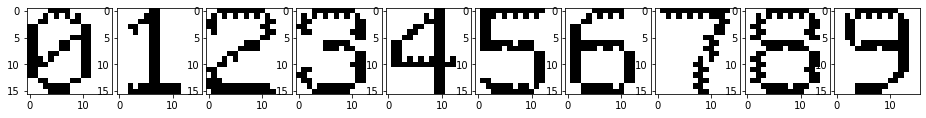

In [5]:
# Build dataset
dataset = np.ndarray(shape=(10, 1, 16, 16), dtype = np.float32)
dataset[0] = pixel_0
dataset[1] = pixel_1
dataset[2] = pixel_2
dataset[3] = pixel_3
dataset[4] = pixel_4
dataset[5] = pixel_5
dataset[6] = pixel_6
dataset[7] = pixel_7
dataset[8] = pixel_8
dataset[9] = pixel_9

# reshape dataset from (10, 1, 16, 16) 变为 (10, 1, 16x16)
dataset_reshaped = np.ndarray(shape=(10,1,256), dtype = np.float32)
dataset_reshaped[0] = dataset[0].reshape(1,256)
dataset_reshaped[1] = dataset[1].reshape(1,256)
dataset_reshaped[2] = dataset[2].reshape(1,256)
dataset_reshaped[3] = dataset[3].reshape(1,256)
dataset_reshaped[4] = dataset[4].reshape(1,256)
dataset_reshaped[5] = dataset[5].reshape(1,256)
dataset_reshaped[6] = dataset[6].reshape(1,256)
dataset_reshaped[7] = dataset[7].reshape(1,256)
dataset_reshaped[8] = dataset[8].reshape(1,256)
dataset_reshaped[9] = dataset[9].reshape(1,256)

# show the images in the dataset.
(fig, axes) = plt.subplots(1, 10 ,figsize=(16,16))
fig.subplots_adjust(hspace=0.3, wspace=0.05)
for (idx, ax) in enumerate (axes):
    ax.imshow(dataset[idx, 0], cmap='gray', interpolation='nearest', vmin=0, vmax=1)

In [6]:
# label all images in dataset
labels = np.array(['0', '1', '2', '3', '4', '5', '6', '7', '8','9'])
# build training dataset by using the dataset
dataset_train  = dataset_reshaped
labels_train  = labels
dataset_train.shape

(10, 1, 256)

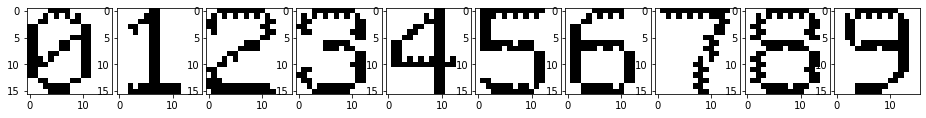

In [7]:
# display all images in the training dataset. At this point, training dataset is equal to dataset
(fig, axes) = plt.subplots(1, 10 ,figsize=(16,16))
fig.subplots_adjust(hspace=0.3, wspace=0.05)
for (i, ax) in enumerate(axes):
    ax.imshow(dataset[i,0], cmap='gray', interpolation='nearest', vmin=0, vmax=1)

# Design and develop a single-layer perceptron (SLP) in Python, using librarie PyTorch.

In [8]:
# Construct a fully-connected network using torch.nn.Sequential. 
# This container first uses nn.Linear as input, and then use the output of nn.Linear as the input of nn.Sigmoid().
# Sigmoid() used as a activation function in neural networks to map variables between 0 and 1.
training_model = torch.nn.Sequential(nn.Linear(256, 256), nn.Sigmoid())
# Use Adam as our optimization method
optimizer = optim.Adam(training_model.parameters(), lr=1e-3)
# Eliminate the effect of random number
np.random.seed(0)
torch.manual_seed(0)
# Mean-Square-Zero (MSE) Loss function
criterion = nn.MSELoss()
all_loss = []

# Train SLP on the 10 images that comprise the dataset developed in Step 1. Testing SLP to ensure it functions correctly as an autoassociative memory.

## Preliminary tests to decide the number of training epochs

### epoch = 1

In [9]:
# Begin training
epochs = 1
for epoch in range(epochs):
#   Change numpy to tensor
    input_data = torch.from_numpy(dataset_train)
    output_data = torch.from_numpy(dataset_train)
#   Prediction 
    predict_out = training_model(input_data)
    loss = criterion(predict_out, output_data)
#   Sampling
    if epoch <= 10 :
        print("Epoch: " + str(epoch) + " --- "+ "Loss: " + str(loss.item()))
    all_loss.append(loss)
    optimizer.zero_grad()
#   Backward propagation
    loss.backward()
    optimizer.step()

Epoch: 0 --- Loss: 0.2747262120246887


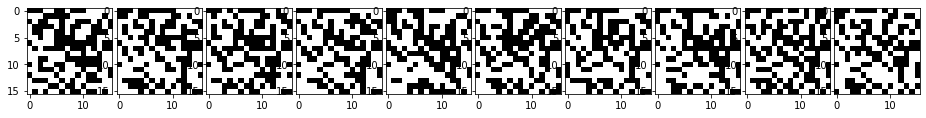

In [10]:
# test SLP to ensure it functions correctly as an autoassociative memory
# output the test results
fig, axes = plt.subplots(1, 10, figsize=(16, 16))
fig.subplots_adjust(hspace=0.3, wspace=0.05)
for idx , data in enumerate(dataset_train):
    input_data = torch.from_numpy(data)
    output_data = training_model(input_data)
#   binaryzation 1 for white, 0 for black
#   mask
    output_data[output_data > 0.5] = 1
    output_data[output_data <= 0.5] = 0
#   change tensor data to numpy data in order to construct the image
    output_image = output_data.detach().numpy()
    output_image = output_image.reshape(16,16)
    ax = axes.flatten()[idx]
    ax.imshow(output_image, cmap='gray', interpolation='nearest')  

### epoch = 10

In [11]:
# Begin training
epochs = 10
for epoch in range(epochs):
#   Change numpy to tensor
    input_data = torch.from_numpy(dataset_train)
    output_data = torch.from_numpy(dataset_train)
#   Prediction 
    predict_out = training_model(input_data)
    loss = criterion(predict_out, output_data)
#   Sampling
    if epoch <= 10 :
        print("Epoch: " + str(epoch) + " --- "+ "Loss: " + str(loss.item()))
    all_loss.append(loss)
    optimizer.zero_grad()
#   Backward propagation
    loss.backward()
    optimizer.step()

Epoch: 0 --- Loss: 0.24809542298316956
Epoch: 1 --- Loss: 0.2246008664369583
Epoch: 2 --- Loss: 0.2043733149766922
Epoch: 3 --- Loss: 0.1873280555009842
Epoch: 4 --- Loss: 0.1732148677110672
Epoch: 5 --- Loss: 0.16167744994163513
Epoch: 6 --- Loss: 0.1523124873638153
Epoch: 7 --- Loss: 0.1447177529335022
Epoch: 8 --- Loss: 0.13852396607398987
Epoch: 9 --- Loss: 0.13341152667999268


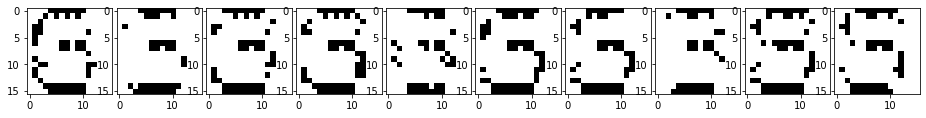

In [12]:
# test SLP to ensure it functions correctly as an autoassociative memory
# output the test results
fig, axes = plt.subplots(1, 10, figsize=(16, 16))
fig.subplots_adjust(hspace=0.3, wspace=0.05)
for idx , data in enumerate(dataset_train):
    input_data = torch.from_numpy(data)
    output_data = training_model(input_data)
#   binaryzation 1 for white, 0 for black
#   mask
    output_data[output_data > 0.5] = 1
    output_data[output_data <= 0.5] = 0
#   change tensor data to numpy data in order to construct the image
    output_image = output_data.detach().numpy()
    output_image = output_image.reshape(16,16)
    ax = axes.flatten()[idx]
    ax.imshow(output_image, cmap='gray', interpolation='nearest')

### epoch = 100

In [13]:
# Begin training
epochs = 100
for epoch in range(epochs):
#   Change numpy to tensor
    input_data = torch.from_numpy(dataset_train)
    output_data = torch.from_numpy(dataset_train)
#   Prediction 
    predict_out = training_model(input_data)
    loss = criterion(predict_out, output_data)
#   Sampling
    if epoch % 10 == 0 :
        print("Epoch: " + str(epoch) + " --- "+ "Loss: " + str(loss.item()))
    all_loss.append(loss)
    optimizer.zero_grad()
#   Backward propagation
    loss.backward()
    optimizer.step()

Epoch: 0 --- Loss: 0.1291162520647049
Epoch: 10 --- Loss: 0.10327708721160889
Epoch: 20 --- Loss: 0.08497106283903122
Epoch: 30 --- Loss: 0.0697062537074089
Epoch: 40 --- Loss: 0.05741431191563606
Epoch: 50 --- Loss: 0.0474204421043396
Epoch: 60 --- Loss: 0.03929341956973076
Epoch: 70 --- Loss: 0.03276478499174118
Epoch: 80 --- Loss: 0.027529682964086533
Epoch: 90 --- Loss: 0.023296961560845375


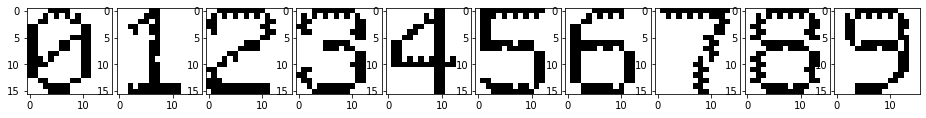

In [14]:
# test SLP to ensure it functions correctly as an autoassociative memory
# output the test results
fig, axes = plt.subplots(1, 10, figsize=(16, 16))
fig.subplots_adjust(hspace=0.3, wspace=0.05)
for idx , data in enumerate(dataset_train):
    input_data = torch.from_numpy(data)
    output_data = training_model(input_data)
#   binaryzation 1 for white, 0 for black
#   mask
    output_data[output_data > 0.5] = 1
    output_data[output_data <= 0.5] = 0
#   change tensor data to numpy data in order to construct the image
    output_image = output_data.detach().numpy()
    output_image = output_image.reshape(16,16)
    ax = axes.flatten()[idx]
    ax.imshow(output_image, cmap='gray', interpolation='nearest') 

Text(0, 0.5, 'Loss')

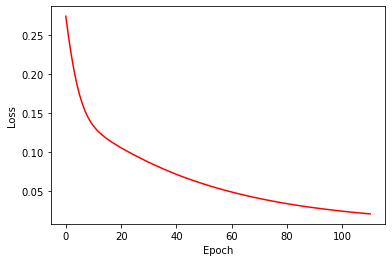

In [15]:
# output the loss graph
all_loss_array = []
for i in range (0, len(all_loss)):
    all_loss_array.append(all_loss[i].detach().numpy())
    
plt.plot(all_loss_array, color='r')
plt.xlabel("Epoch")
plt.ylabel("Loss")

## Epoch = 500 and begin training

In [16]:
# Begin training
epochs = 500
step = 10
for epoch in range(epochs):
#   Change numpy to tensor
    input_data = torch.from_numpy(dataset_train)
    output_data = torch.from_numpy(dataset_train)
#   Prediction 
    predict_out = training_model(input_data)
    loss = criterion(predict_out, output_data)
#   Sampling loss every 10 epoch
    if epoch % step == 0 :
        print("Epoch: " + str(epoch) + " --- "+ "Loss: " + str(loss.item()))
    all_loss.append(loss)
    optimizer.zero_grad()
#   Backward propagation
    loss.backward()
    optimizer.step()

Epoch: 0 --- Loss: 0.019869117066264153
Epoch: 10 --- Loss: 0.017110953107476234
Epoch: 20 --- Loss: 0.014868232421576977
Epoch: 30 --- Loss: 0.013050447218120098
Epoch: 40 --- Loss: 0.01156122237443924
Epoch: 50 --- Loss: 0.010330180637538433
Epoch: 60 --- Loss: 0.009301846846938133
Epoch: 70 --- Loss: 0.00843256525695324
Epoch: 80 --- Loss: 0.0076896557584404945
Epoch: 90 --- Loss: 0.007048421539366245
Epoch: 100 --- Loss: 0.00649018120020628
Epoch: 110 --- Loss: 0.006000506225973368
Epoch: 120 --- Loss: 0.005568102467805147
Epoch: 130 --- Loss: 0.005183997564017773
Epoch: 140 --- Loss: 0.00484097097069025
Epoch: 150 --- Loss: 0.004533143248409033
Epoch: 160 --- Loss: 0.004255684092640877
Epoch: 170 --- Loss: 0.004004582762718201
Epoch: 180 --- Loss: 0.0037764888256788254
Epoch: 190 --- Loss: 0.0035685773473232985
Epoch: 200 --- Loss: 0.0033784559927880764
Epoch: 210 --- Loss: 0.0032040835358202457
Epoch: 220 --- Loss: 0.0030437088571488857
Epoch: 230 --- Loss: 0.0028958229813724756


Text(0, 0.5, 'Loss')

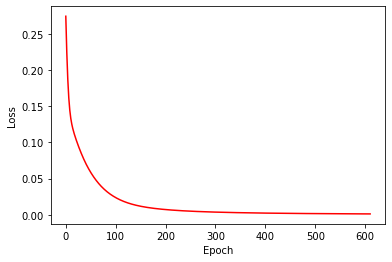

In [17]:
# output the loss graph
all_loss_array = []
for i in range (0, len(all_loss)):
#   change tensor to numpy
    all_loss_array.append(all_loss[i].detach().numpy())
    
plt.plot(all_loss_array, color='r')
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Test SLP on the entire dataset trained on in Step 3 -- with no noise introduced into the input dataset.

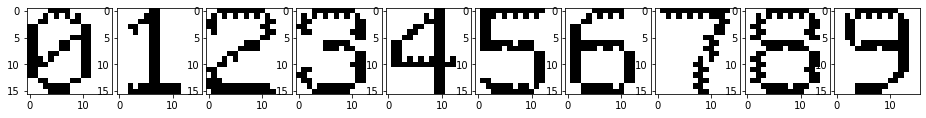

In [18]:
# test SLP to ensure it functions correctly as an autoassociative memory
# output the test results
fig, axes = plt.subplots(1, 10, figsize=(16, 16))
fig.subplots_adjust(hspace=0.3, wspace=0.05)
for idx , data in enumerate(dataset_train):
    input_data = torch.from_numpy(data)
    output_data = training_model(input_data)
#   binaryzation 1 for white, 0 for black
    output_data[output_data > 0.5] = 1
    output_data[output_data <= 0.5] = 0
#   change tensor data to numpy data in order to construct the image
    output_image = output_data.detach().numpy()
    output_image = output_image.reshape(16,16)
    ax = axes.flatten()[idx]
    ax.imshow(output_image, cmap='gray', interpolation='nearest')

In [19]:
# define Fh and Ffa
# 0 refer black and 1 refer white
def metrics (true_value, cal_value):
    Fh = sum((true_value == 0) & (true_value == cal_value))/ sum(true_value == 0)
    Ffa = sum((true_value == 1) & (true_value != cal_value))/ sum(true_value == 1)
    return Fh, Ffa

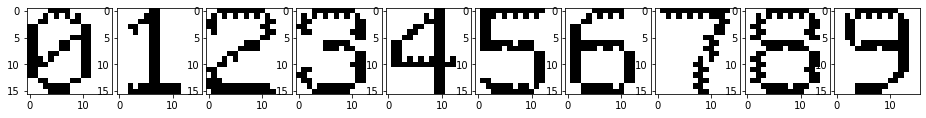

In [20]:
# Apply your trained SLP in autoassociative mode to the dataset X, collecting output data in a test dataset Y.
# At this point, test dataset is equal to train dataset.
# store Fh and Ffa
all_Fh = []
all_Ffa = []
fig, axes = plt.subplots(1, 10, figsize=(16, 16))
fig.subplots_adjust(hspace=0.3, wspace=0.05)
for idx , data in enumerate(dataset_train):
    X = torch.from_numpy(data)
    Y = training_model(X)
#   binaryzation 0 for white, 1 for black
    Y[Y > 0.5] = 1
    Y[Y <= 0.5] = 0
#   change tensor data to numpy data in order to construct the image
    Y_image = Y.detach().numpy()
    Y_image = Y_image.reshape(16,16)
    ax = axes.flatten()[idx]
    ax.imshow(Y_image, cmap='gray', interpolation='nearest')
#   calculate Fh, Ffa by using function mentioned above
    X = X.flatten().detach().numpy()
    Y = Y.flatten().detach().numpy()
    Fh, Ffa = metrics(X, Y)
    all_Fh.append(Fh)
    all_Ffa.append(Ffa)

In [21]:
all_Ffa

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Text(0, 0.5, 'Fh')

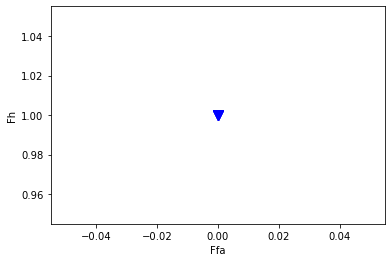

In [22]:
# Graph Fh as a function of Ffa for each exemplar in the input dataset
plt.scatter(all_Ffa, all_Fh,marker='v',color='b',s=100)
plt.xlabel("Ffa")
plt.ylabel("Fh")

# Perturb the dataset (the 10 images that you developed in Step 1) by adding noise, and saving the performance results.

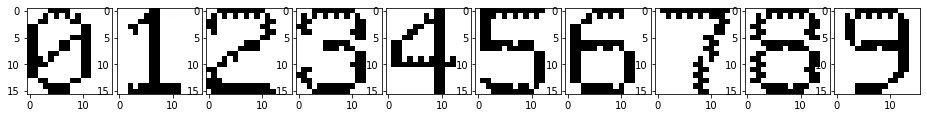

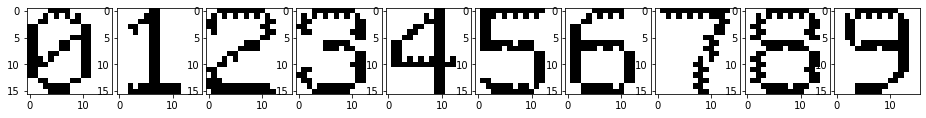

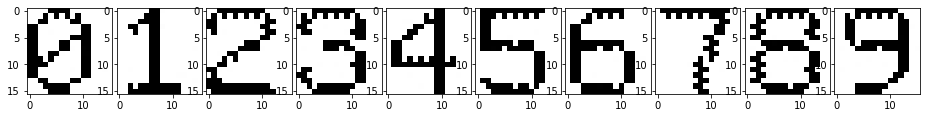

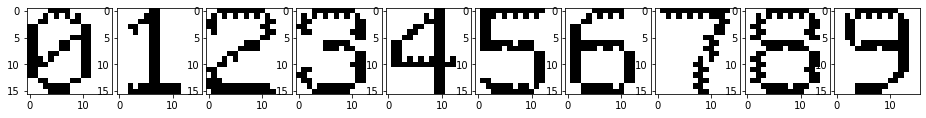

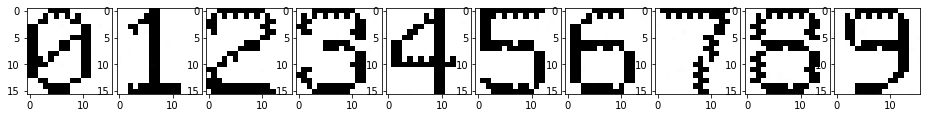

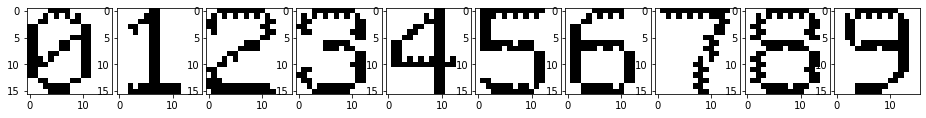

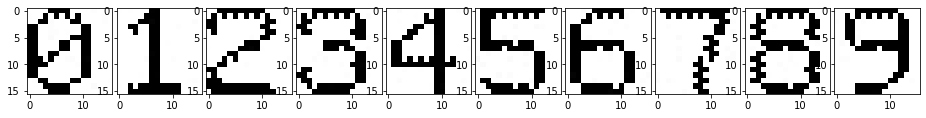

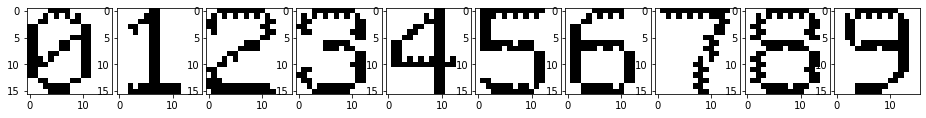

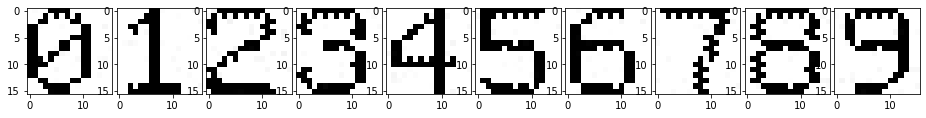

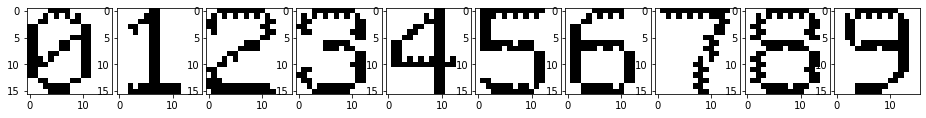

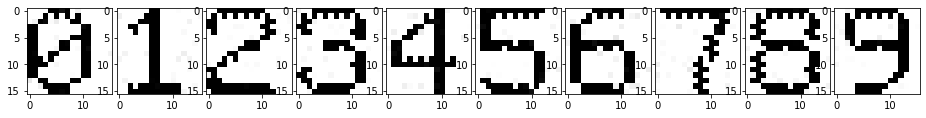

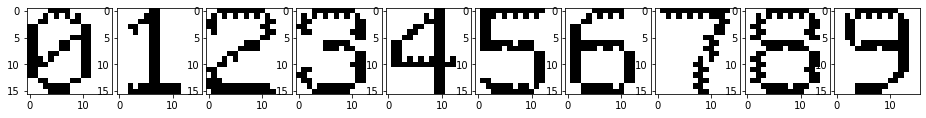

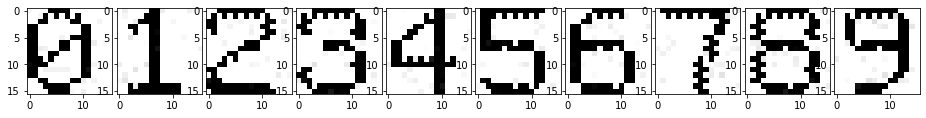

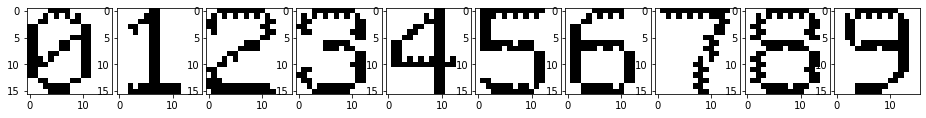

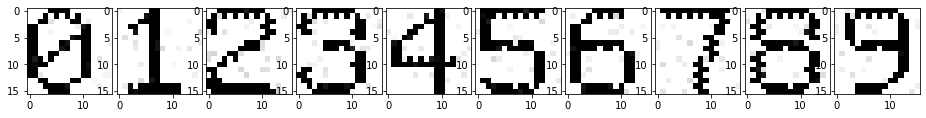

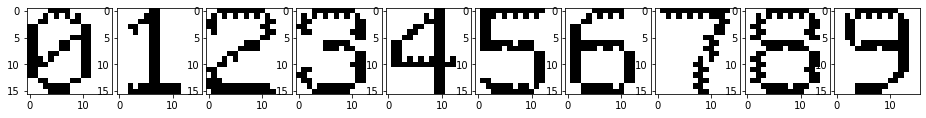

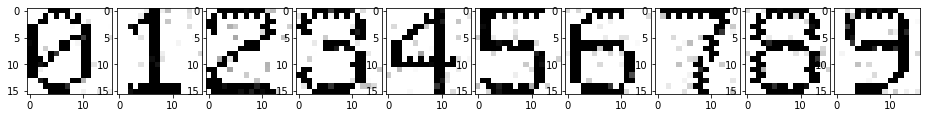

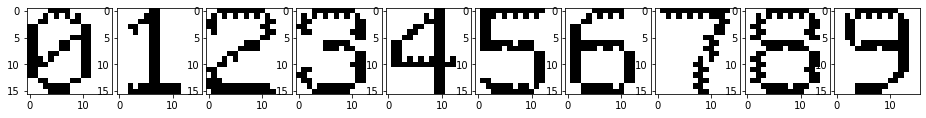

In [23]:
# noise
std_list = [0.001, 0.002, 0.003, 0.005, 0.01, 0.02, 0.03, 0.05, 0.1]
# store the results for 9 different noise situations
all_Fh_list = []
all_Ffa_list = []

# Gaussian-distributed，zero mean，std_list as standard deviation, 25 noise pixels per iamge
for noise in std_list:
    dataset_noised = np.ndarray(shape=dataset_reshaped.shape, dtype=np.float32)
    for i in range(len(dataset_reshaped)):
#       generate 25 random noise pixels 
        s = np.random.normal(0, noise, 25)
        index = random.sample(list(range(256)), 25)
        dataset_noised[i] = dataset_reshaped[i] 
#       add noise
        dataset_noised[i, 0, index] = dataset_noised[i, 0, index] + s
#       renormalize the noise-corrupted image so all of its pixels have values in the interval [0,1].
#       normalization
        dataset_noised[i,0,index] = (dataset_noised[i,0,index] 
                            - np.min(dataset_noised[i,0,index])) / (np.max(dataset_noised[i,0,index]) 
                                                            - np.min(dataset_noised[i,0,index]))

#   print the images with noise
    fig, axes = plt.subplots(1, 10, figsize=(16, 16))
    fig.subplots_adjust(hspace=0.3, wspace=0.05)
    for idx , data in enumerate(dataset_noised):
        data = data.reshape(16,16)
        ax = axes.flatten()[idx]
        ax.imshow(data, cmap='gray', interpolation='nearest')
        
#   there are total 9 noise cases, show test results in each case
    fig, axes = plt.subplots(1, 10, figsize=(16, 16))
    fig.subplots_adjust(hspace=0.3, wspace=0.05)


#   testing model using dataset_noised
    all_Fh = []
    all_Ffa = []
    for idx , data in enumerate(dataset_noised):
        X = torch.from_numpy(data)
        Y = training_model(X)
#       binaryzation 0 for white, 1 for black
        Y[Y > 0.5] = 1
        Y[Y <= 0.5] = 0
#       change tensor data to numpy data in order to construct the image
        Y_image = Y.detach().numpy()
        Y_image = Y_image.reshape(16,16)
        ax = axes.flatten()[idx]
#       print the testing results
        ax.imshow(Y_image, cmap='gray', interpolation='nearest')
#       calculate Fh, Ffa by using function mentioned above
        X = X.flatten().detach().numpy()
        Y = Y.flatten().detach().numpy()
        Fh, Ffa = metrics(X, Y)
        all_Fh.append(Fh)
        all_Ffa.append(Ffa)
    all_Fh_list.append(all_Fh)
    all_Ffa_list.append(all_Ffa)

# Display Data from your Tests in Step 5.

In [24]:
# Gather your results into a table of Fh and Ffa versus test-image-ID, with one column per each value of the standard deviation,
# tabel
std_list_Fh = ["Fh_stdev=0.001", "Fh_stdev=0.002", "Fh_stdev=0.003", "Fh_stdev=0.005",
            "Fh_stdev=0.01", "Fh_stdev=0.02", "Fh_stdev=0.03", "Fh_stdev=0.05", "Fh_stdev=0.1"]

std_list_Ffa = ["Ffa_stdev=0.001", "Ffa_stdev=0.002", "Ffa_stdev=0.003", "Ffa_stdev=0.005",
            "Ffa_stdev=0.01", "Ffa_stdev=0.02", "Ffa_stdev=0.03", "Ffa_stdev=0.05", "Ffa_stdev=0.1"]
Fh_dataframe = pd.DataFrame(all_Fh_list, columns=labels, index=std_list_Fh).T
Ffa_dataframe = pd.DataFrame(all_Ffa_list, columns=labels, index=std_list_Ffa).T
Table = pd.DataFrame()

for i in range(Fh_dataframe.shape[1]):
    Table = pd.concat([Table,Fh_dataframe.iloc[:,i],Ffa_dataframe.iloc[:,i]],axis=1)
Table = Table.round(decimals = 2)
Table

,Fh_stdev=0.001,Ffa_stdev=0.001,Fh_stdev=0.002,Ffa_stdev=0.002,Fh_stdev=0.003,Ffa_stdev=0.003,Fh_stdev=0.005,Ffa_stdev=0.005,Fh_stdev=0.01,Ffa_stdev=0.01,Fh_stdev=0.02,Ffa_stdev=0.02,Fh_stdev=0.03,Ffa_stdev=0.03,Fh_stdev=0.05,Ffa_stdev=0.05,Fh_stdev=0.1,Ffa_stdev=0.1
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
7,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
8,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


Text(0.5, 1.0, '$\\bf{Graph}$ $\\bf{of}$ $\\bf{Fh}$ $\\bf{and}$ $\\bf{Ffa}$ $\\bf{vs.}$ $\\bf{Noise}$ $\\bf{Standard}$ $\\bf{Deviation}$\nfor noise-corrupted Alphanumeric Imagery (16x16 pixels) for Autoassociative Single-Layer Perceptron')

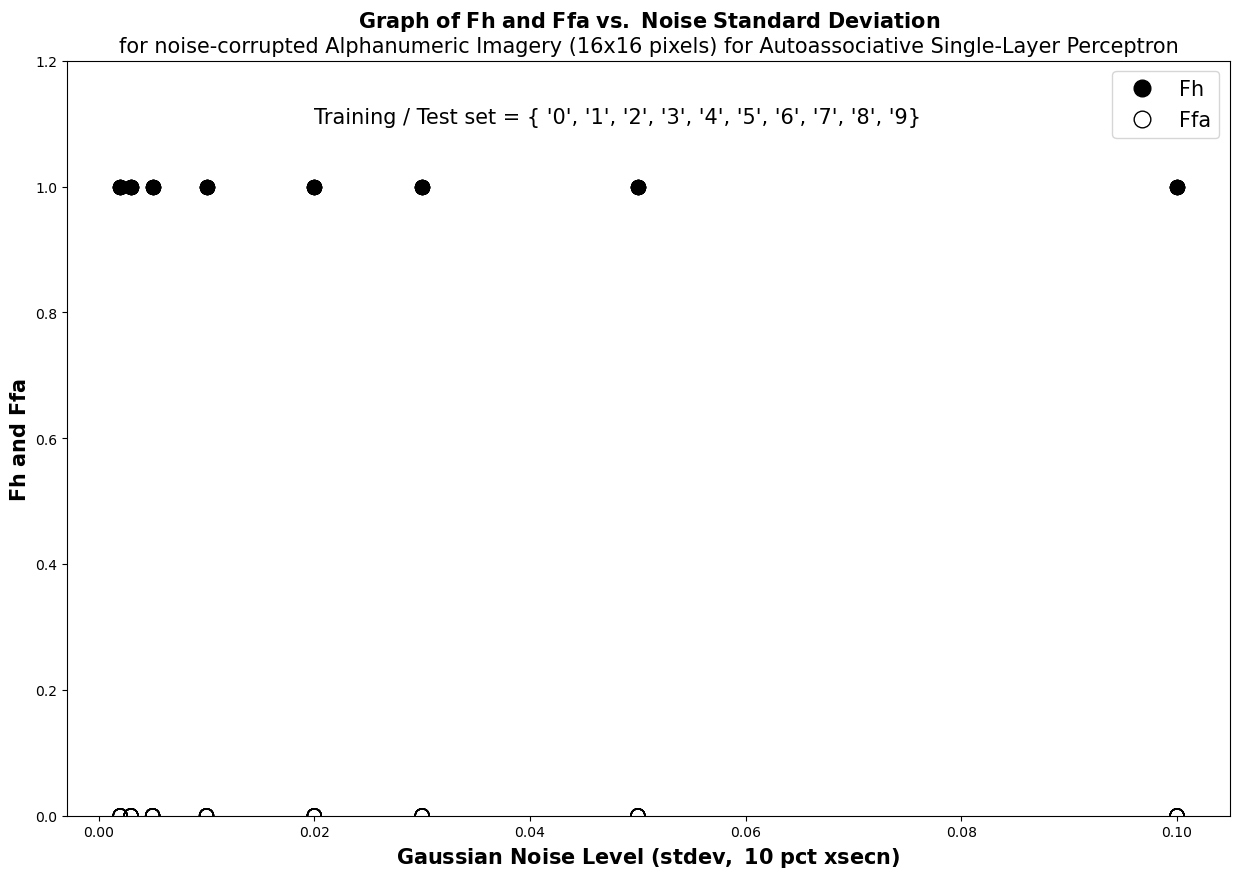

In [25]:
from matplotlib.pyplot import MultipleLocator
plt.figure(figsize=[15,10],dpi=100)
ax.xaxis.set_major_locator(MultipleLocator(0.01))
for i in range(1, len(std_list)):
    plt.scatter([std_list[i]] * 10, all_Fh_list[i], 
                marker='o', color='black',s=100)
    plt.scatter([std_list[i]] * 10, all_Ffa_list[i], 
                facecolors='none', edgecolors='black',s=100)
plt.ylim(0, 1.20)
plt.xlabel(r"$\bf{" + "Gaussian" + "}$" + " " +
           r"$\bf{" + "Noise" + "}$" + " " +
           r"$\bf{" + "Level" + "}$" + " " +
           r"$\bf{" + "(stdev," + "}$" + " " +
           r"$\bf{" + "10" + "}$" + " " +
           r"$\bf{" + "pct" + "}$" + " " +
           r"$\bf{" + "xsecn)" + "}$" + " ", fontsize=15)
plt.ylabel(r"$\bf{" + "Fh" + "}$" + " " +
           r"$\bf{" + "and" + "}$" + " " +
           r"$\bf{" + "Ffa" + "}$" + " ", fontsize=15)
Fh_dots = Line2D([0], [0], marker='o', color='k', lw=0, markersize=12, markerfacecolor='k', label='Fh')
Ffa_dots = Line2D([0], [0], marker='o', color='k', lw=0, markersize=12, markerfacecolor='w', label='Ffa')
legend_elements = [Fh_dots, Ffa_dots]
plt.legend(handles=legend_elements,fontsize=15,loc='upper right')
plt.text(0.02,1.1,"Training / Test set = { '0', '1', '2', '3', '4', '5', '6', '7', '8', '9}",
         fontsize=15)
plt.title(r"$\bf{"+"Graph"+"}$" + " " +
          r"$\bf{"+"of"+"}$" + " " +
          r"$\bf{"+"Fh"+"}$" + " " +
          r"$\bf{"+"and"+"}$" + " " +
          r"$\bf{"+"Ffa"+"}$" + " " +
          r"$\bf{"+"vs."+"}$" + " " +
          r"$\bf{"+"Noise"+"}$" + " " +
          r"$\bf{"+"Standard"+"}$" + " " +
          r"$\bf{"+"Deviation"+"}$" +
          "\nfor noise-corrupted Alphanumeric Imagery (16x16 pixels) for Autoassociative Single-Layer Perceptron",
          fontsize = 15)

# Extra Points: SMNN

## SMNN Construction

In [26]:
training_model_smnn = torch.nn.Sequential(nn.Linear(256, 256), nn.Sigmoid(),
                                     nn.Linear(256,256),nn.Sigmoid(),
                                     nn.Linear(256,256),nn.Sigmoid())
optimizer_smnn = optim.Adam(training_model_smnn.parameters(), lr=1e-3)
np.random.seed(0)
torch.manual_seed(0)
# Mean-Square-Zero (MSE) Loss function
criterion_smnn = nn.MSELoss()
all_loss_smnn = []

## SMNN Training

### A Preliminary Test: Epoch = 100

In [27]:
# Begin training
epochs = 100
step = 10
for epoch in range(epochs):
#   Change numpy to tensor
    input_data = torch.from_numpy(dataset_train)
    output_data = torch.from_numpy(dataset_train)
#   Prediction 
    predict_out = training_model_smnn(input_data)
    loss = criterion_smnn(predict_out, output_data)
#   Sampling loss every 10 epoch
    if epoch % step == 0 :
        print("Epoch: " + str(epoch) + " --- "+ "Loss: " + str(loss.item()))
    all_loss_smnn.append(loss)
    optimizer_smnn.zero_grad()
#   Backward propagation
    loss.backward()
    optimizer_smnn.step()

Epoch: 0 --- Loss: 0.2533615231513977
Epoch: 10 --- Loss: 0.14702758193016052
Epoch: 20 --- Loss: 0.14108730852603912
Epoch: 30 --- Loss: 0.13942848145961761
Epoch: 40 --- Loss: 0.13804508745670319
Epoch: 50 --- Loss: 0.13514623045921326
Epoch: 60 --- Loss: 0.12729890644550323
Epoch: 70 --- Loss: 0.11500407755374908
Epoch: 80 --- Loss: 0.10478620231151581
Epoch: 90 --- Loss: 0.09438872337341309


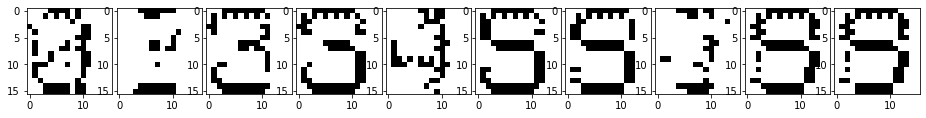

In [28]:
# test SMNN to ensure it functions correctly as an autoassociative memory
# output the test results
fig, axes = plt.subplots(1, 10, figsize=(16, 16))
fig.subplots_adjust(hspace=0.3, wspace=0.05)
for idx , data in enumerate(dataset_train):
    input_data = torch.from_numpy(data)
    output_data = training_model_smnn(input_data)
#     binaryzation 1 for white, 0 for black
#     mask 索引将图片二值化
    output_data[output_data > 0.5] = 1
    output_data[output_data <= 0.5] = 0
#     change tensor data to numpy data in order to construct the image
    output_image = output_data.detach().numpy()
    output_image = output_image.reshape(16,16)
    ax = axes.flatten()[idx]
    ax.imshow(output_image, cmap='gray', interpolation='nearest')
    

### Begin Training

In [29]:
# Begin training
epochs = 500
step = 10
for epoch in range(epochs):
#   Change numpy to tensor
    input_data = torch.from_numpy(dataset_train)
    output_data = torch.from_numpy(dataset_train)
#   Prediction 
    predict_out = training_model_smnn(input_data)
    loss = criterion_smnn(predict_out, output_data)
#   Sampling loss every 10 epoch
    if epoch % step == 0 :
        print("Epoch: " + str(epoch) + " --- "+ "Loss: " + str(loss.item()))
    all_loss_smnn.append(loss)
    optimizer_smnn.zero_grad()
#   Backward propagation
    loss.backward()
    optimizer_smnn.step()

Epoch: 0 --- Loss: 0.08331135660409927
Epoch: 10 --- Loss: 0.07326652109622955
Epoch: 20 --- Loss: 0.06401066482067108
Epoch: 30 --- Loss: 0.05543651059269905
Epoch: 40 --- Loss: 0.04767967015504837
Epoch: 50 --- Loss: 0.04078109562397003
Epoch: 60 --- Loss: 0.03471357375383377
Epoch: 70 --- Loss: 0.029396003112196922
Epoch: 80 --- Loss: 0.024826977401971817
Epoch: 90 --- Loss: 0.020895561203360558
Epoch: 100 --- Loss: 0.01755007542669773
Epoch: 110 --- Loss: 0.014822147786617279
Epoch: 120 --- Loss: 0.012521217577159405
Epoch: 130 --- Loss: 0.010490179061889648
Epoch: 140 --- Loss: 0.00889238528907299
Epoch: 150 --- Loss: 0.007700649090111256
Epoch: 160 --- Loss: 0.006691259332001209
Epoch: 170 --- Loss: 0.005879485048353672
Epoch: 180 --- Loss: 0.005249634385108948
Epoch: 190 --- Loss: 0.004693288821727037
Epoch: 200 --- Loss: 0.004133408889174461
Epoch: 210 --- Loss: 0.0036217798478901386
Epoch: 220 --- Loss: 0.0031263374257832766
Epoch: 230 --- Loss: 0.0028448370285332203
Epoch: 24

## SMNN Testing

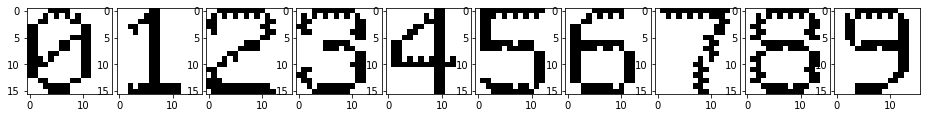

In [30]:
# test SLP to ensure it functions correctly as an autoassociative memory
# output the test results
fig, axes = plt.subplots(1, 10, figsize=(16, 16))
fig.subplots_adjust(hspace=0.3, wspace=0.05)
for idx , data in enumerate(dataset_train):
    input_data = torch.from_numpy(data)
    output_data = training_model_smnn(input_data)
#   binaryzation 1 for white, 0 for black
    output_data[output_data > 0.5] = 1
    output_data[output_data <= 0.5] = 0
#   change tensor data to numpy data in order to construct the image
    output_image = output_data.detach().numpy()
    output_image = output_image.reshape(16,16)
    ax = axes.flatten()[idx]
    ax.imshow(output_image, cmap='gray', interpolation='nearest')

In [31]:
# Apply your trained SLP in autoassociative mode to the dataset X, collecting output data in a test dataset Y.
# At this point, test dataset is equal to train dataset.
# store Fh and Ffa
all_Fh_smnn = []
all_Ffa_smnn = []
for idx , data in enumerate(dataset_train):
    X = torch.from_numpy(data)
    Y = training_model_smnn(X)
#     binaryzation 0 for white, 1 for black
    Y[Y > 0.5] = 1
    Y[Y <= 0.5] = 0
#     calculate Fh, Ffa by using function mentioned above
    X = X.flatten().detach().numpy()
    Y = Y.flatten().detach().numpy()
    Fh, Ffa = metrics(X, Y)
    all_Fh_smnn.append(Fh)
    all_Ffa_smnn.append(Ffa)

In [32]:
all_Ffa_smnn

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [33]:
all_Fh_smnn

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9880952380952381, 1.0]

Text(0, 0.5, 'Fh')

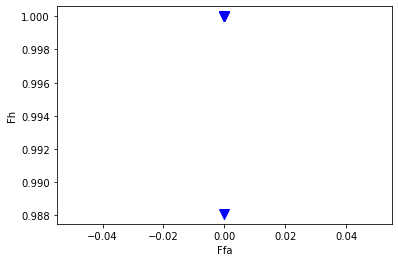

In [34]:
# Graph Fh as a function of Ffa for each exemplar in the input dataset
plt.scatter(all_Ffa_smnn, all_Fh_smnn,marker='v',color='b',s=100)
plt.xlabel("Ffa")
plt.ylabel("Fh")

## Noises Added

### SMNN Training with Noises

In [35]:
# store the results for 9 different noise situations
all_Fh_list_smnn = []
all_Ffa_list_smnn = []
for noise in std_list:
    all_Fh = []
    all_Ffa = []
    for idx , data in enumerate(dataset_noised):
        X = torch.from_numpy(dataset_noised)
        Y = training_model_smnn(X)
#       binaryzation 0 for white, 1 for black
        Y[Y > 0.5] = 1
        Y[Y <= 0.5] = 0
#       calculate Fh, Ffa by using function mentioned above
        X = X.flatten().detach().numpy()
        Y = Y.flatten().detach().numpy()
        Fh, Ffa = metrics(X, Y)
        all_Fh.append(Fh)
        all_Ffa.append(Ffa)
    all_Fh_list_smnn.append(all_Fh)
    all_Ffa_list_smnn.append(all_Ffa)

### SMNN Testing with Noises

In [36]:
# Gather your results into a table of Fh and Ffa versus test-image-ID, with one column per each value of the standard deviation,
# tabel
std_list_Fh = ["Fh_stdev=0.001", "Fh_stdev=0.002", "Fh_stdev=0.003", "Fh_stdev=0.005",
            "Fh_stdev=0.01", "Fh_stdev=0.02", "Fh_stdev=0.03", "Fh_stdev=0.05", "Fh_stdev=0.1"]

std_list_Ffa = ["Ffa_stdev=0.001", "Ffa_stdev=0.002", "Ffa_stdev=0.003", "Ffa_stdev=0.005",
            "Ffa_stdev=0.01", "Ffa_stdev=0.02", "Ffa_stdev=0.03", "Ffa_stdev=0.05", "Ffa_stdev=0.1"]
Fh_dataframe = pd.DataFrame(all_Fh_list_smnn, columns=labels, index=std_list_Fh).T
Ffa_dataframe = pd.DataFrame(all_Ffa_list_smnn, columns=labels, index=std_list_Ffa).T
Table = pd.DataFrame()

for i in range(Fh_dataframe.shape[1]):
    Table = pd.concat([Table,Fh_dataframe.iloc[:,i],Ffa_dataframe.iloc[:,i]],axis=1)
Table = Table.round(decimals = 2)
Table

,Fh_stdev=0.001,Ffa_stdev=0.001,Fh_stdev=0.002,Ffa_stdev=0.002,Fh_stdev=0.003,Ffa_stdev=0.003,Fh_stdev=0.005,Ffa_stdev=0.005,Fh_stdev=0.01,Ffa_stdev=0.01,Fh_stdev=0.02,Ffa_stdev=0.02,Fh_stdev=0.03,Ffa_stdev=0.03,Fh_stdev=0.05,Ffa_stdev=0.05,Fh_stdev=0.1,Ffa_stdev=0.1
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
7,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
8,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


Text(0.5, 1.0, '$\\bf{Graph}$ $\\bf{of}$ $\\bf{Fh}$ $\\bf{and}$ $\\bf{Ffa}$ $\\bf{vs.}$ $\\bf{Noise}$ $\\bf{Standard}$ $\\bf{Deviation}$\nfor noise-corrupted Alphanumeric Imagery (16x16 pixels) for SMNN')

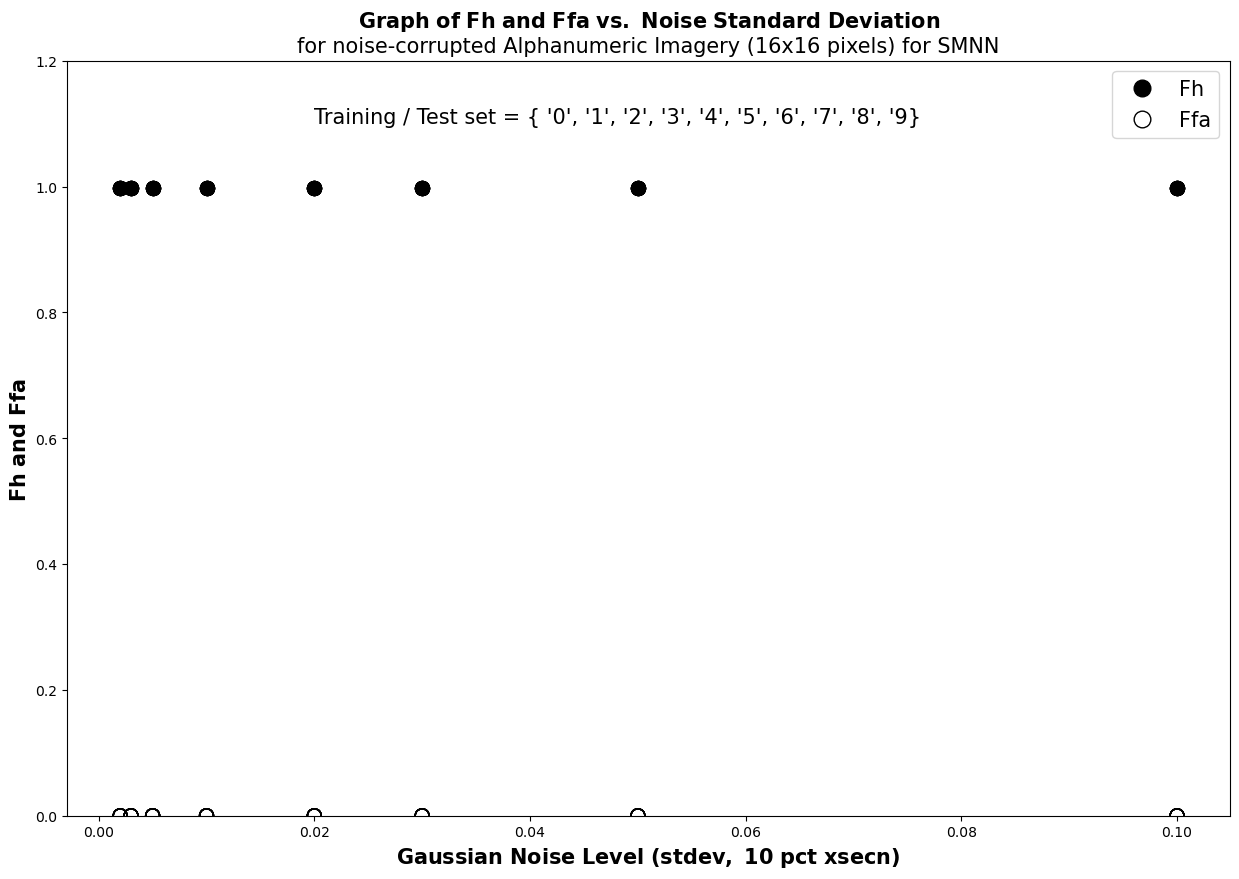

In [37]:
from matplotlib.pyplot import MultipleLocator
plt.figure(figsize=[15,10],dpi=100)
ax.xaxis.set_major_locator(MultipleLocator(0.01))
for i in range(1, len(std_list)):
    plt.scatter([std_list[i]] * 10, all_Fh_list_smnn[i], 
                marker='o', color='black',s=100)
    plt.scatter([std_list[i]] * 10, all_Ffa_list_smnn[i], 
                facecolors='none', edgecolors='black',s=100)
plt.ylim(0, 1.20)
plt.xlabel(r"$\bf{" + "Gaussian" + "}$" + " " +
           r"$\bf{" + "Noise" + "}$" + " " +
           r"$\bf{" + "Level" + "}$" + " " +
           r"$\bf{" + "(stdev," + "}$" + " " +
           r"$\bf{" + "10" + "}$" + " " +
           r"$\bf{" + "pct" + "}$" + " " +
           r"$\bf{" + "xsecn)" + "}$" + " ", fontsize=15)
plt.ylabel(r"$\bf{" + "Fh" + "}$" + " " +
           r"$\bf{" + "and" + "}$" + " " +
           r"$\bf{" + "Ffa" + "}$" + " ", fontsize=15)
Fh_dots = Line2D([0], [0], marker='o', color='k', lw=0, markersize=12, markerfacecolor='k', label='Fh')
Ffa_dots = Line2D([0], [0], marker='o', color='k', lw=0, markersize=12, markerfacecolor='w', label='Ffa')
legend_elements = [Fh_dots, Ffa_dots]
plt.legend(handles=legend_elements,fontsize=15,loc='upper right')
plt.text(0.02,1.1,"Training / Test set = { '0', '1', '2', '3', '4', '5', '6', '7', '8', '9}",
         fontsize=15)
plt.title(r"$\bf{"+"Graph"+"}$" + " " +
          r"$\bf{"+"of"+"}$" + " " +
          r"$\bf{"+"Fh"+"}$" + " " +
          r"$\bf{"+"and"+"}$" + " " +
          r"$\bf{"+"Ffa"+"}$" + " " +
          r"$\bf{"+"vs."+"}$" + " " +
          r"$\bf{"+"Noise"+"}$" + " " +
          r"$\bf{"+"Standard"+"}$" + " " +
          r"$\bf{"+"Deviation"+"}$" +
          "\nfor noise-corrupted Alphanumeric Imagery (16x16 pixels) for SMNN",
          fontsize = 15)